# Downloading ECCO data, extracting variables of interest, and plotting

ECCO Python Docs & Tutorials: 
- [Downloading ECCO data and `ecco_download` package](https://ecco-v4-python-tutorial.readthedocs.io/Downloading_ECCO_Datasets_from_PODAAC_Python.html#ECCO_download-module)
- [Translating from the ECCO native grid to latitude-logitude space](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Interpolating_Fields_to_LatLon_Grid.html)
- [Computing the strength of the MOC at a particular latitude](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Example_OSNAP.html#Compute-the-overturning-streamfunction-in-depth-space)

Miscellaneous links:
- [ECCO analysis tools on NASA site](https://www.ecco-group.org/analysis-tools.htm)
- [PODAAC: Physical Oceanography Distributed Active Archive Center](https://podaac.jpl.nasa.gov/)

In [5]:
import sys
import os
from glob import glob

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("ECCOv4-py")
import ecco_v4_py as ecco
from ecco_download import *

In [6]:
# Set download directory to project directory
download_dir = os.getcwd()
short_name = 'ECCO_L4_SSH_LLC0090GRID_DAILY_V4R4'

# Download SSH for the second week of 2000
ecco_podaac_download(ShortName = short_name,
                     StartDate = '2000-01-08', 
                     EndDate = '2000-01-14', 
                     download_root_dir = download_dir,
                     n_workers = 6, 
                     force_redownload = False)

created download directory C:\Users\aline\OTP\ECCO_L4_SSH_LLC0090GRID_DAILY_V4R4

Total number of matching granules: 7

SEA_SURFACE_HEIGHT_day_mean_2000-01-08_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-09_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-10_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-11_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-12_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-13_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-14_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading
DL Progress: 100%|#######################

In [7]:
# Read the data into xarray stacked into one large array
ecco_file_pattern = os.path.join(download_dir, short_name, '*nc')

xds = xr.open_mfdataset(ecco_file_pattern, parallel = True, data_vars = 'minimal', coords = 'minimal', compat = 'override')
xds['XC']

<xarray.DataArray 'XC' (tile: 13, j: 90, i: 90)>
dask.array<open_dataset-XC, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * tile     (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC       (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
Attributes:
    long_name:              longitude of tracer grid cell center
    units:                  degrees_east
    coordinate:             YC XC
    bounds:                 XC_bnds
    comment:                nonuniform grid spacing
    coverage_content_type:  coordinate
    standard_name:          longitude

In [9]:
grid = ecco.get_llc_grid(xds)
grid

<xgcm.Grid>
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
T Axis (not periodic, boundary=None):
  * center   time

In [4]:
# Extract SSH values and calculate the mean over the week of data
dataarray_plot = xds.SSH
time_mean = dataarray_plot.mean('time').compute()

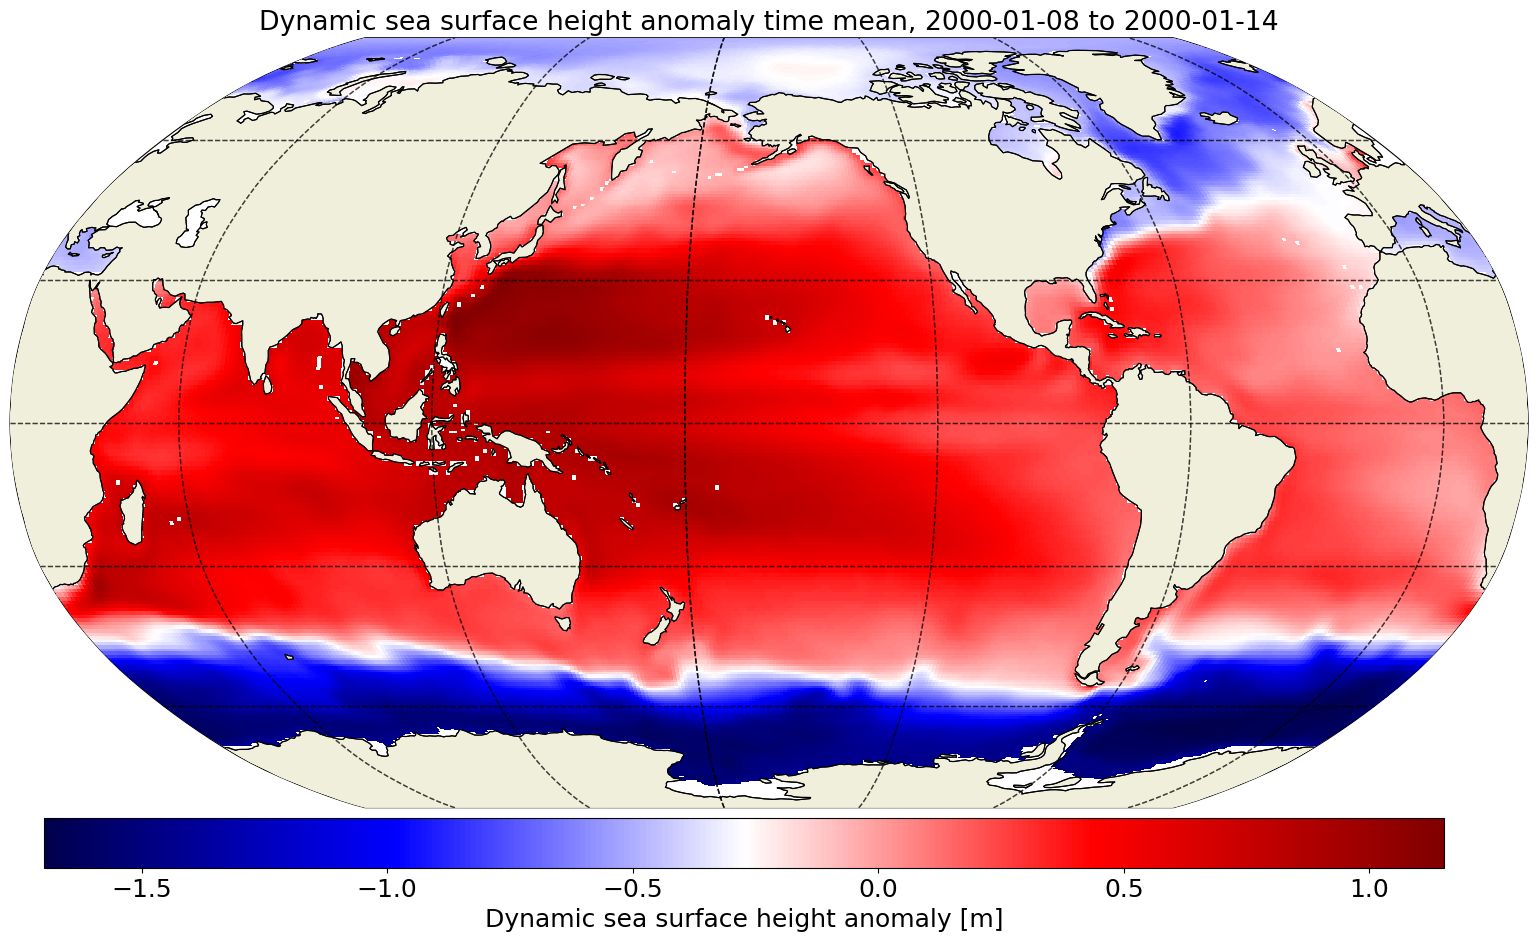

In [16]:
# Setting up plot parameters
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = [20, 10])
time_values = dataarray_plot.time.data
title_str = dataarray_plot.long_name + ' time mean, ' + str(time_values[0])[ : 10] + ' to ' + str(time_values[-1])[ : 10]

# Plotting SSH mean over the week-long period - by default, values are interpolated to a 0.25x0.25 degree grid!
plot_obj = ecco.plot_proj_to_latlon_grid(dataarray_plot.XC, dataarray_plot.YC, time_mean, show_colorbar = False, 
                                         user_lon_0 = 200, cmap = 'seismic')
plt.title(title_str)

# Add colorbar
cax = plt.axes([0.15, 0.05, 0.7, 0.05])
cbar = plt.colorbar(plot_obj[2], cax = cax, orientation = 'horizontal')
cbar.set_label(dataarray_plot.long_name + ' [' + dataarray_plot.units + ']', fontsize = 18)
cax.tick_params(labelsize = 18)

get_basin_name:  ['atl', 'mexico', 'hudson', 'med', 'north', 'baffin', 'gin'] /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data
load_binary_array: loading file /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)


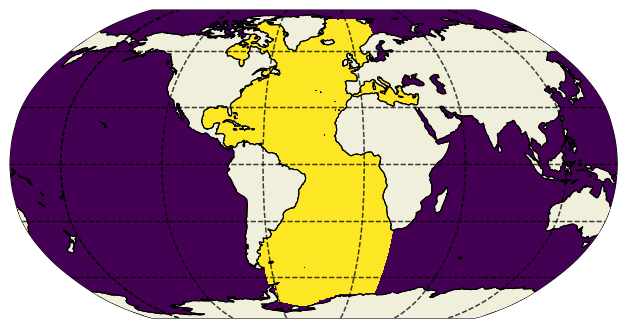

In [63]:
# Get basin mask for the Atlantic ocean
atl_mask = ecco.get_basin_mask(basin_name = 'atlExt', mask = xr.ones_like(xds.YC))

# Plot the mask as a sanity check
plt.figure(figsize = (8, 4))
ecco.plot_proj_to_latlon_grid(xds.XC, xds.YC, atl_mask, projection_type = 'robin', cmap = 'viridis', user_lon_0 = -30, show_colorbar = False);

In [98]:
# Apply the mask to the time-mean SSH and extract all longitudes for latitude of interest
SSH_atl = time_mean * atl_mask

# Re-projecting SSH from native ECCO coordinates to 1x1 degree lat-lon grid with interpolation
new_grid_delta_lat = 1
new_grid_delta_lon = 1

new_grid_min_lat = -90
new_grid_max_lat = 90

new_grid_min_lon = -180
new_grid_max_lon = 180

new_grid_lon_centers, new_grid_lat_centers, \
new_grid_lon_edges, new_grid_lat_edges, \
field_nearest_1deg = ecco.resample_to_latlon(dataarray_plot.XC, 
                                             dataarray_plot.YC, 
                                             SSH_atl,
                                             new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                             new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                             fill_value = np.NaN, 
                                             mapping_method = 'nearest_neighbor',
                                             radius_of_influence = 120000)

# Extract values at the latitude of interest - 20.5 N
SSH_lat_205 = field_nearest_1deg * (new_grid_lat_centers == 20.5)

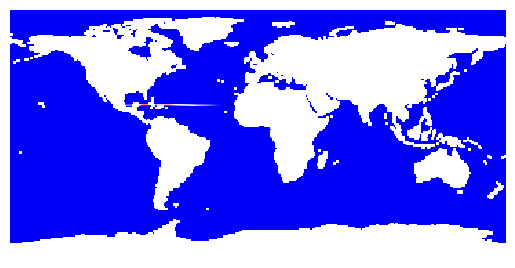

In [118]:
# Plot the resulting array:
#   - land has NaN values
#   - other latitudes have values of 0
#   - latitude of interest retains values
plt.imshow(SSH_lat_205, origin = 'lower', cmap = 'seismic')
plt.axis('off');

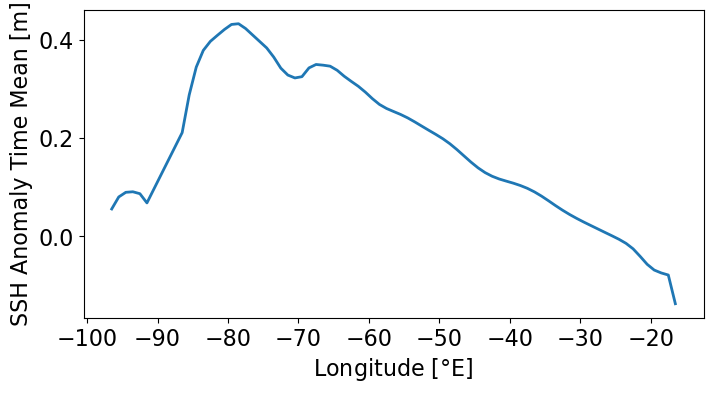

In [143]:
# Plotting this as a curve to match NN input in Solodoch et al. (2023)
nonzero_coords = np.nonzero(np.nan_to_num(SSH_lat_205))
SSH_lat_205_1d = SSH_lat_205[nonzero_coords[0], nonzero_coords[1]]
lon_values = new_grid_lon_centers[0][nonzero_coords[1]]

plt.figure(figsize = (8, 4))
plt.plot(lon_values, SSH_lat_205_1d, linewidth = 2)
plt.xlabel('Longitude [$\\degree$E]')
plt.ylabel('SSH Anomaly Time Mean [m]');